In [35]:
# Import all necessary libraries.

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier# Step1: Create data set
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import mode
from sklearn.base import clone
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [36]:
# Gerar conjunto de Luas
N=1000
x,y =  make_moons(n_samples=500, noise=0.30, random_state=42)

In [37]:
# Conjunto de Treinamento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

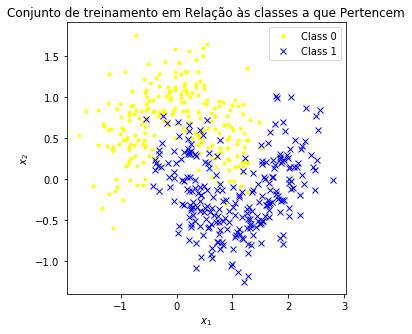

In [38]:
#fig=plt.figure()

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0', color = 'yellow')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1', color = 'blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Conjunto de treinamento em Relação às classes a que Pertencem')
plt.legend()
plt.show()

In [39]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('A previsão da classificação é de', accuracy_score(y_test, y_pred))

A previsão da classificação é de 0.9


[Text(204.84473684210528, 209.07692307692307, 'X[1] <= 0.374\ngini = 0.499\nsamples = 400\nvalue = [207, 193]'),
 Text(105.72631578947369, 192.35076923076923, 'X[0] <= -0.436\ngini = 0.36\nsamples = 225\nvalue = [53, 172]'),
 Text(96.91578947368421, 175.62461538461537, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(114.53684210526316, 175.62461538461537, 'X[1] <= -0.046\ngini = 0.259\nsamples = 203\nvalue = [31, 172]'),
 Text(35.242105263157896, 158.89846153846153, 'X[1] <= -0.343\ngini = 0.092\nsamples = 124\nvalue = [6, 118]'),
 Text(26.431578947368422, 142.1723076923077, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(44.05263157894737, 142.1723076923077, 'X[1] <= -0.342\ngini = 0.211\nsamples = 50\nvalue = [6, 44]'),
 Text(35.242105263157896, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(52.863157894736844, 125.44615384615385, 'X[0] <= 1.278\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(44.05263157894737, 108.72, 'X[0] <= 0.839\ngini = 0.285

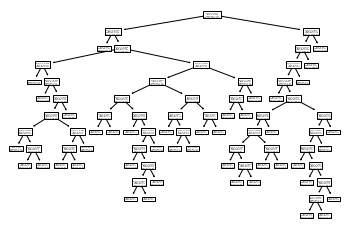

In [40]:
# Para Plotar a Arvore.
plot_tree (tree_clf)

In [41]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [42]:
y_pred = bag_clf.predict(X_test)
print('A previsão da classificação é de', accuracy_score(y_test, y_pred))

A previsão da classificação é de 0.9


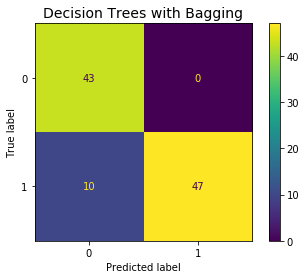

In [43]:
# Plotar matrix de confusão
plot_confusion_matrix(bag_clf, X_test, y_test) 
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show() 

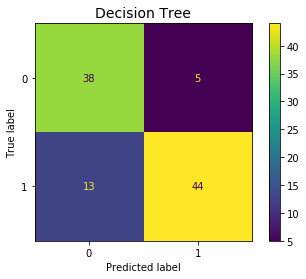

In [44]:
# Plotar matrix de confusão
plot_confusion_matrix(tree_clf, X_test, y_test) 
plt.title("Decision Tree", fontsize=14)
plt.show() 

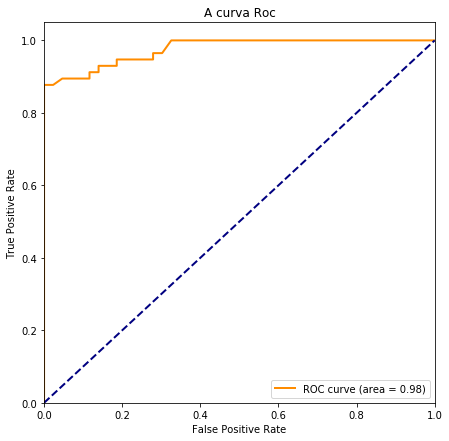

In [45]:
# Getting the probabilities for each class.
y_prob = bag_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(7, 7))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A curva Roc')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()

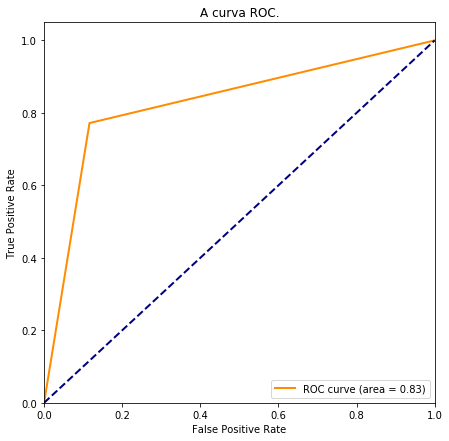

In [46]:
# Getting the probabilities for each class.
y_prob = tree_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(7, 7))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A curva ROC.')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()

(251, 327)


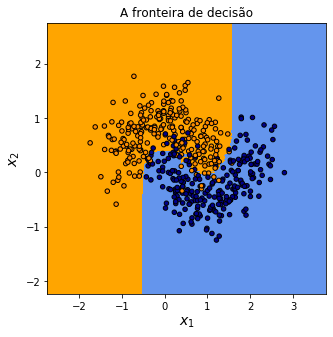

In [47]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("A fronteira de decisão")

plt.savefig('decision_boundary_lr.png', dpi=600)
plt.show()

(251, 327)


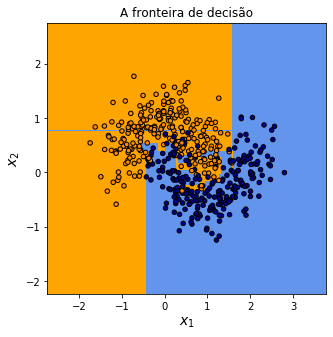

In [48]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("A fronteira de decisão")

plt.savefig('decision_boundary_lr.png', dpi=600)
plt.show()

h) Analisando a figura de Fronteira de decisão dos dois classificadores O método de ensemble generaliza melhor os dados do que uma única Decision Tree